## Observations and Insights

## Dependencies and starter code

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata,study_results, on="Mouse ID")
combined_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

new_df = combined_data.groupby("Drug Regimen")
mean_df = new_df["Tumor Volume (mm3)"].mean()
median_df = new_df["Tumor Volume (mm3)"].median()
variance_df = new_df["Tumor Volume (mm3)"].var()
std_df = new_df["Tumor Volume (mm3)"].std()
sem_df = new_df["Tumor Volume (mm3)"].sem()
item_name = new_df["Drug Regimen"]



statistical_summary={"Mean Tumor Volume (mm3)":mean_df,
                    "Median Tumor Volume (mm3)":median_df,
                    "Tumor Volume Variance":variance_df,
                    "Tumor Volume Std. Dev":std_df,
                    "Tumor Volume Std. Err":sem_df}

#Convert to data frame
statistical_summary_df = pd.DataFrame(statistical_summary)
statistical_summary_df.head()

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [16]:
#Change the column names
statistical_df = statistical_summary_df.rename(columns={"Mean Tumor Volume (mm3)":"mean",
                                                      "Median Tumor Volume (mm3)":"median",
                                                      "Tumor Volume Variance":"var",
                                                      "Tumor Volume Std. Dev":"std",
                                                      "Tumor Volume Std. Err":"sem"})
statistical_df.head()

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar plots

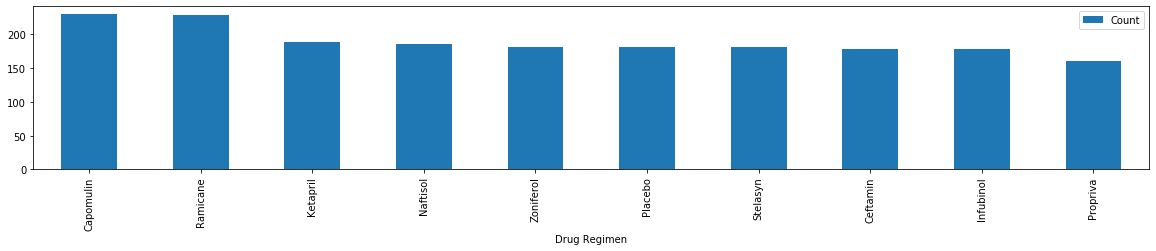

In [17]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

#Filter the dataframe down to only those columns to chart
count_data = new_df["Drug Regimen"].count()

#Create two lists of the data we are going to pass into a new data frame
names = []
count = []
for n,c in count_data.items():
    names.append(n)
    count.append(c)

#Create the dataframe
count_df = {"Drug Regimen":names,"Count":count}
count_df = pd.DataFrame(count_df)


#Set the index to be Drug REgimen so they will be used as labels
count_df = count_df.set_index("Drug Regimen")

#Sort the data frame becasue we want it to look pretty
count_df = count_df.sort_values(by=["Count"], ascending = False)

#Use DataFrame.plot() in order to create a bar chart of the data
count_df.plot(kind="bar", figsize=(20,3))


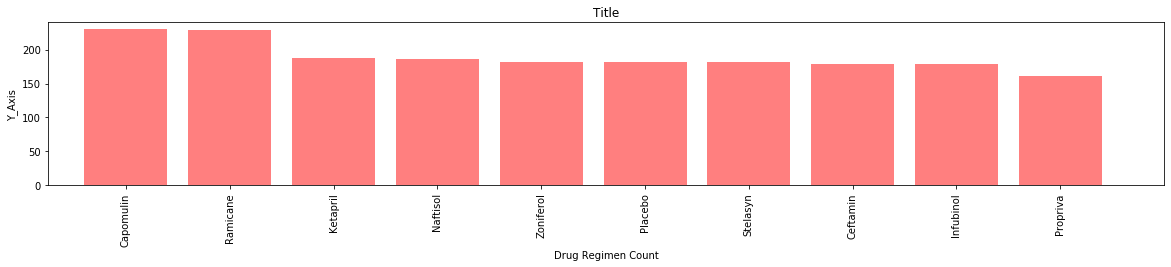

In [18]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

#Filter the dataframe down to only those columns to chart
count_data = new_df["Drug Regimen"].count()

#Create two lists of the data we are going to pass into a new data frame
names = []
count = []
for n,c in count_data.items():
    names.append(n)
    count.append(c)

#Create the dataframe
count_df = {"Drug Regimen":names,"Count":count}
count_df = pd.DataFrame(count_df)

#Sort the dataframe
count_df = count_df.sort_values(by=["Count"], ascending = False)

#Start the plotting stuff
x_axis = np.arange(len(count_df))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(20,3))
plt.bar(x_axis,count_df["Count"], color = 'r', alpha = 0.5, align = "center")
plt.xticks(tick_locations, count_df["Drug Regimen"],rotation = "vertical")
plt.xlim(-0.75,len(x_axis))
plt.ylim(0,max(count_df["Count"])+10)
plt.title("Title")
plt.xlabel("Drug Regimen Count")
plt.ylabel("Y_Axis")
plt.show()



## Pie plots

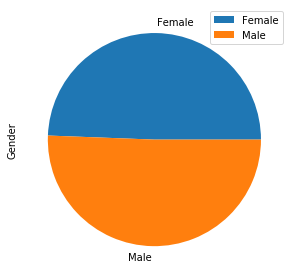

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_groups = combined_data.groupby('Sex')
gender_trips = gender_groups['Sex'].count()

#Create the list that we will need in order to pass it through to the data frame
names = []
counts = []
for n,c in gender_trips.items():
    names.append(n)
    counts.append(c)

#Create the dataframe
mice_gender_df = {"Gender":names,"Count":counts}
mice_gender_df = pd.DataFrame(mice_gender_df)
mice_gender_df.head()


#Set the index to gender so we can use it as labels
mice_gender_df = mice_gender_df.set_index("Gender")

#Create the list of informaiton that we want a pie made out of
gender_list = mice_gender_df.keys()

#Code for making a pie, not from scratch this is definitely from the frozen food section
gender_pie = mice_gender_df.plot(kind="pie", y=gender_list)
gender_pie.set_ylabel("Gender")
plt.tight_layout()

plt.show()


(-1.104561372365897,
 1.1002172082078998,
 -1.1027130801595113,
 1.1051728496244888)

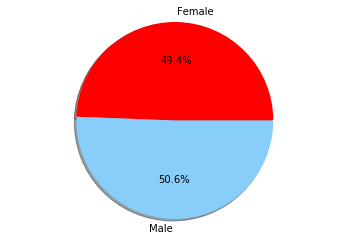

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_groups = combined_data.groupby('Sex')
gender_trips = gender_groups['Sex'].count() #or count_value

#Create the list that we will need in order to pass it through to the data frame
names = []
counts = []
for n,c in gender_trips.items():
    names.append(n)
    counts.append(c)

explode=(0,0)
plt.pie(counts,explode=explode,labels=names,colors=["red","lightskyblue"],autopct="%1.1f%%", shadow = True, startangle = 360)
plt.axis("equal")

## Quartiles, outliers and boxplots

In [107]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Pass to a new data set that is ordred
# If you want to sort on multiple things you need to give it a list []
# If you want to send in one list then you dont have to delcare it as a list if you want one item sort
new_sorted_data = combined_data.sort_values(["Mouse ID","Timepoint"], ascending = False)

#This the max tumor volume from each mouse
max_time = new_sorted_data.drop_duplicates(subset="Mouse ID", keep="first")

#Limit by the drug regimen
top_drugs = max_time.loc[(max_time["Drug Regimen"] == "Capomulin") | (max_time["Drug Regimen"] == "Ramicane") | (max_time["Drug Regimen"] == "Infubinol") | (max_time["Drug Regimen"] == "Ceftamin"), :]

#Get down to tumor volume in one data frame so we can calcualte iqr
capomulin_max = max_time.loc[max_time["Drug Regimen"] == "Capomulin", :]
capomulin_tumor_volume = capomulin_max["Tumor Volume (mm3)"] #pull out only the information that you want to reduce the series down by
capomulin_quartiles = capomulin_tumor_volume.quantile([0.25,0.5,0.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq - capomulin_lowerq

#Get down to tumor volume in one data frame so we can calcualte iqr
Ramicane_max = max_time.loc[max_time["Drug Regimen"] == "Ramicane", :]
Ramicane_tumor_volume = Ramicane_max["Tumor Volume (mm3)"]
Ramicane_quartiles = Ramicane_tumor_volume.quantile([0.25,0.5,0.75])
Ramicane_lowerq = Ramicane_quartiles[0.25]
Ramicane_upperq = Ramicane_quartiles[0.75]
Ramicane_iqr = Ramicane_upperq - Ramicane_lowerq

#Get down to tumor volume in one data frame so we can calcualte iqr
Infubinol_max = max_time.loc[max_time["Drug Regimen"] == "Infubinol", :]
Infubinol_tumor_volume = Infubinol_max["Tumor Volume (mm3)"]
Infubinol_quartiles = Infubinol_tumor_volume.quantile([0.25,0.5,0.75])
Infubinol_lowerq = Infubinol_quartiles[0.25]
Infubinol_upperq = Infubinol_quartiles[0.75]
Infubinol_iqr = Infubinol_upperq - Infubinol_lowerq

#Get down to tumor volume in one data frame so we can calcualte iqr
Ceftamin_max = max_time.loc[max_time["Drug Regimen"] == "Ceftamin", :]
Ceftamin_tumor_volume = Ceftamin_max["Tumor Volume (mm3)"]
Ceftamin_quartiles = Ceftamin_tumor_volume.quantile([0.25,0.5,0.75])
Ceftamin_lowerq = Ceftamin_quartiles[0.25]
Ceftamin_upperq = Ceftamin_quartiles[0.75]
Ceftamin_iqr = Ceftamin_upperq - Ceftamin_lowerq

#print(capomulin_iqr)
#print(Ramicane_iqr)
#print(Infubinol_iqr)
#print(Ceftamin_iqr)


#capomulin_tumor_volume.head()
# Do the group by in order to do math on a certaing group by
# Creat a re-usable object to do math on



9.098536719999998
11.477135160000003
15.577752179999997


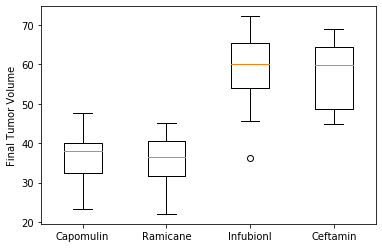

In [110]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1,ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume")
labels = ["Capomulin","Ramicane","Infubionl","Ceftamin"]
ax1.boxplot([capomulin_tumor_volume,Ramicane_tumor_volume,Infubinol_tumor_volume,Ceftamin_tumor_volume],labels=labels)
plt.show()

## Line and scatter plots

Text(0.5, 0, 'Timepoint (days)')

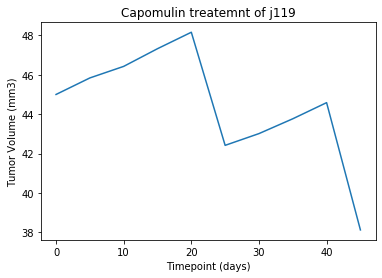

In [23]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#Only capomulin
#data frame with Tumor Volume and timepoint

#Get a data frame and filter down the data to one mouse
capomulin = combined_data[["Drug Regimen","Tumor Volume (mm3)","Timepoint","Mouse ID"]]
#filter down to one drug
capomulin = capomulin.loc[capomulin["Drug Regimen"] == "Capomulin", :]
#filter down to one mouse
capomulin = capomulin.loc[capomulin["Mouse ID"] == "j119", :]

#Pass the data frame to only include x and y
data = capomulin[["Timepoint","Tumor Volume (mm3)"]]
#here we pass the data and remove the data frame functionality
timepoint = capomulin["Timepoint"]
#pass more data to remove the data frame functionality
volume = capomulin["Tumor Volume (mm3)"]

#Create a blank list to push the above items to
x_axis = []
y_axis = []

#append to the list from the data set above
for i,c in timepoint.items():
    x_axis.append(c)
#append to the list from the data set above
for i,c in volume.items():
    y_axis.append(c)

#plot the items using the below method
plt.plot(x_axis,y_axis)
plt.title("Capomulin treatemnt of j119")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")


Text(0.5, 0, 'Weight (g)')

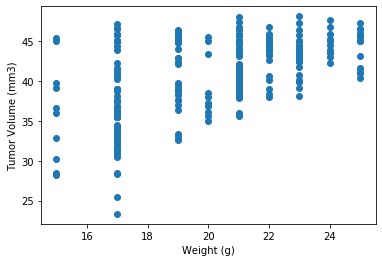

In [24]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


#Get a data frame and filter down the data to one mouse
capomulin = combined_data[["Drug Regimen","Tumor Volume (mm3)","Timepoint","Mouse ID","Weight (g)"]]
#filter down to one drug
capomulin = capomulin.loc[capomulin["Drug Regimen"] == "Capomulin", :]

#Pass the data frame to only include x and y
data = capomulin[["Weight (g)","Tumor Volume (mm3)"]]


#here we pass the data and remove the data frame functionality
timepoint = capomulin["Weight (g)"]
#pass more data to remove the data frame functionality
volume = capomulin["Tumor Volume (mm3)"]

#Create a blank list to push the above items to
x_axis = []
y_axis = []

#append to the list from the data set above
for i,c in timepoint.items():
    x_axis.append(c)
#append to the list from the data set above
for i,c in volume.items():
    y_axis.append(c)

#plot the items using the below method
plt.scatter(x_axis,y_axis)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")






#Didn't work with grouping

#Here I'm trying to pass the average weight to an x

#x_axis_df = data.groupby("Weight (g)").mean()
#print(len(x_axis_df))
#y_axis_df = data.groupby("Weight (g)").mean()["Tumor Volume (mm3)"]
#print(len(y_axis_df))
#print(x_axis_df)

#Create a blank list to push the above items to
#x_axis = []
#y_axis = []

#append to the list from the data set above
#for i,c in x_axis_df.items():
#    x_axis.append(c)
#append to the list from the data set above
#for i,c in y_axis_df.items():
#    y_axis.append(c)

#print(x_axis)
#plot the items using the below method
#plt.scatter(x_axis,y_axis)
#plt.ylabel("Tumor Volume (mm3)")
#plt.xlabel("Weight (g)")



The rvalue for this set of data is 0.53
y =0.96x +21.49


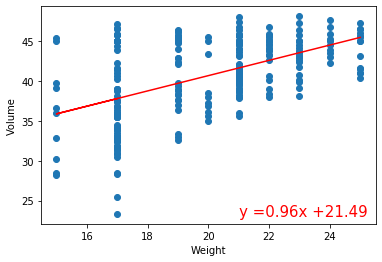

In [53]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

#Perform a linear regression on temperature vs latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(timepoint,volume)

print(f"The rvalue for this set of data is {round(rvalue,2)}")

regress_values = timepoint * slope + intercept
#print(regress_values)

line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(timepoint,volume)
plt.plot(timepoint,regress_values,"r-")
#plt.label("Label here")
plt.xlabel("Weight")
plt.ylabel("Volume")
plt.annotate(line_eq,(21,23),fontsize=15,color="red")
plt.show()
